https://docs.sciml.ai/ModelingToolkit/dev/tutorials/initialization/#Parameter-initialization-by-example

In [1]:
using ModelingToolkit, OrdinaryDiffEq, Plots
using ModelingToolkit: t_nounits as t, D_nounits as D

### .0 `sys`

In [2]:
@variables x(t) y(t)
@parameters total
@mtkbuild sys = ODESystem([D(x) ~ -x, total ~ x + y], t;
    defaults = [total => missing], guesses = [total => 1.0])

Model sys:
Equations (1):
  1 standard: see equations(sys)
Unknowns (1): see unknowns(sys)
  x(t)
Parameters (1): see parameters(sys)
  total [defaults to missing]
Observed (1): see observed(sys)

In [3]:
"""
Unknowns (1)
    x(t) ▪ Unassigned
Parameters (1)
    total ▪ missing
Equations (1)
    Differential(t)(x(t)) ~ -x(t)
Equations_substitutions (1)
    y(t) ~ total - x(t)
"""
nothing

Core.nothing

In [4]:
parameters(sys) |> display
observed(sys) |> display
unknowns(sys) |> display
equations(sys) |> display

1-element Vector{Any}:
 total

1-element Vector{Equation}:
 y(t) ~ total - x(t)

1-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 x(t)

1-element Vector{Equation}:
 Differential(t)(x(t)) ~ -x(t)

Given any two of x, y and total we can determine the remaining variable.

In [5]:
prob = ODEProblem(sys, [sys.x => 1.0, sys.y => 2.0], (0.0, 10.0))
integ = init(prob, Tsit5())
integ.ps[total]

3.0

### .1 (sys)

In [7]:
isys1 = generate_initializesystem(sys)
parameters(isys1) |> display
equations(isys1) |> display
unknowns(isys1) |> display
observed(isys1) |> display

5-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 Initial(y(t))
 Initial(x(t))
 Initial(yˍt(t))
 Initial(xˍt(t))
 t

1-element Vector{Equation}:
 0 ~ total - x(t) - y(t)

3-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 x(t)
 y(t)
 total

Equation[]

In [9]:
structural_simplify(isys1; fully_determined = false)

Model sys:
Parameters (5): see parameters(sys)
  t
  Initial(y(t)) [defaults to 0]
  Initial(x(t)) [defaults to 0]
  Initial(yˍt(t)) [defaults to 0]
  ⋮
Observed (3): see observed(sys)

In [10]:
isys1_prob = ODEProblem(sys, [], (0.0, 5.0))

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 0.0

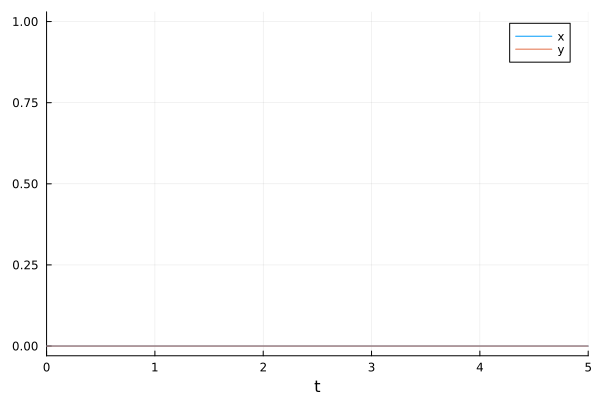

In [11]:
isys1_sol = solve(isys1_prob, Tsit5(); saveat=0.1)
plot(isys1_sol, idxs=[sys.x, sys.y]) |> display

### .2 (sys, u0map=[sys.x=>1.0])

In [12]:
isys2 = generate_initializesystem(sys, u0map=[sys.x=>1.0])
parameters(isys2) |> display
equations(isys2) |> display
unknowns(isys2) |> display
observed(isys2) |> display

5-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 Initial(y(t))
 Initial(x(t))
 Initial(yˍt(t))
 Initial(xˍt(t))
 t

2-element Vector{Equation}:
 0 ~ 1.0 - x(t)
 0 ~ total - x(t) - y(t)

3-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 x(t)
 y(t)
 total

Equation[]

In [13]:
isys2_prob = ODEProblem(sys, [sys.x=>1.0], (0.0, 5.0))

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 1.0

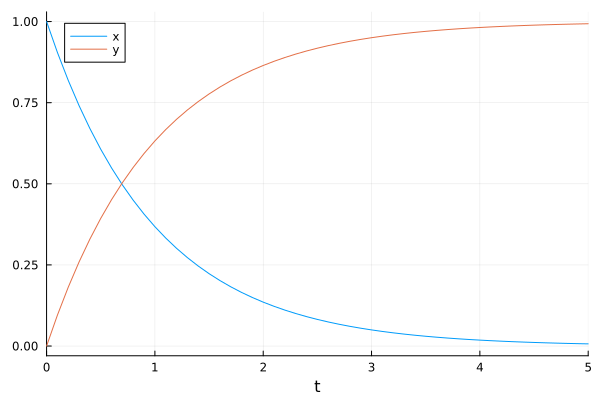

In [14]:
isys2_sol = solve(isys2_prob, Tsit5(); saveat=0.1)
plot(isys2_sol, idxs=[sys.x, sys.y]) |> display

### .3 (sys, u0map=[sys.y=>1.0])

In [15]:
isys3 = generate_initializesystem(sys, u0map=[sys.y=>1.0])
parameters(isys3) |> display
equations(isys3) |> display
unknowns(isys3) |> display
observed(isys3) |> display

5-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 Initial(y(t))
 Initial(x(t))
 Initial(yˍt(t))
 Initial(xˍt(t))
 t

2-element Vector{Equation}:
 0 ~ 1.0 - y(t)
 0 ~ total - x(t) - y(t)

3-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 x(t)
 y(t)
 total

Equation[]

In [16]:
isys3_prob = ODEProblem(sys, [sys.y=>1.0], (0.0, 5.0))

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 -1.0

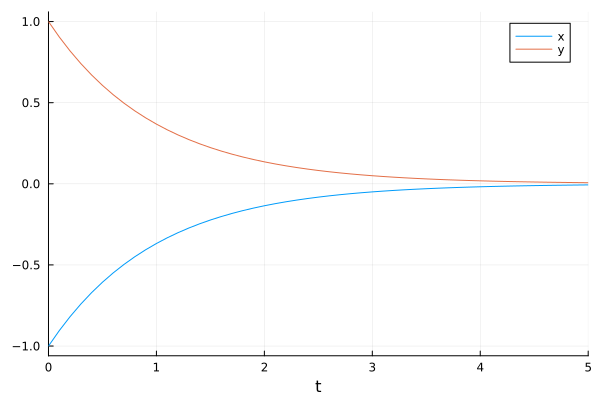

In [253]:
isys3_sol = solve(isys3_prob, Tsit5(); saveat=0.1)
plot(isys3_sol, idxs=[sys.x, sys.y]) |> display

### .4 (sys, pmap=[total=>4.0])

In [17]:
isys4 = generate_initializesystem(sys, pmap=[total=>4.0])
parameters(isys4) |> display
equations(isys4) |> display
unknowns(isys4) |> display
observed(isys4) |> display

5-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 Initial(y(t))
 Initial(x(t))
 Initial(yˍt(t))
 Initial(xˍt(t))
 t

2-element Vector{Equation}:
 0 ~ 4.0 - total
 0 ~ total - x(t) - y(t)

3-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 x(t)
 y(t)
 total

Equation[]

In [18]:
isys4_prob = ODEProblem(sys, [], (0.0, 5.0), [total => 4.0])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 4.0

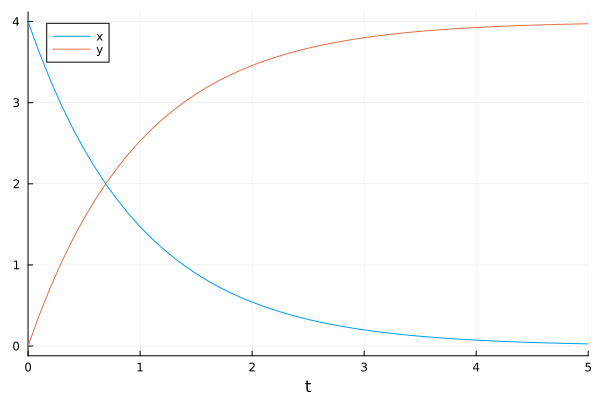

In [19]:
isys4_sol = solve(isys4_prob, Tsit5(); saveat=0.1)
plot(isys4_sol, idxs=[sys.x, sys.y]) |> display

### .5 (sys, u0map=[sys.x=>1.0, sys.y=>1.0])

In [20]:
isys5 = generate_initializesystem(sys, u0map=[sys.x=>1.0, sys.y=>1.0])
parameters(isys5) |> display
equations(isys5) |> display
unknowns(isys5) |> display
observed(isys5) |> display

5-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 Initial(y(t))
 Initial(x(t))
 Initial(yˍt(t))
 Initial(xˍt(t))
 t

3-element Vector{Equation}:
 0 ~ 1.0 - x(t)
 0 ~ 1.0 - y(t)
 0 ~ total - x(t) - y(t)

3-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 x(t)
 y(t)
 total

Equation[]

In [21]:
isys5_prob = ODEProblem(sys, [sys.x=>1.0, sys.y=>1.0], (0.0, 5.0))

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 1.0

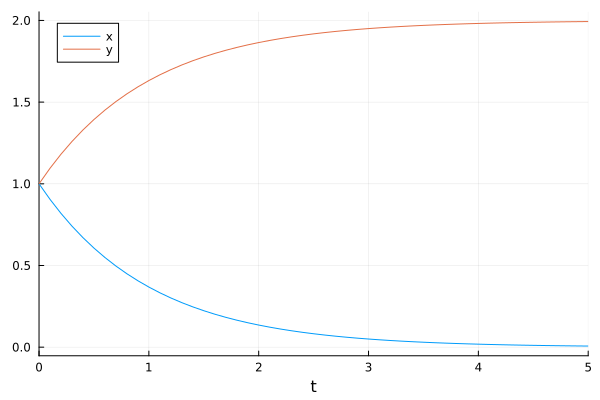

In [22]:
isys5_sol = solve(isys5_prob, Tsit5(); saveat=0.1)
plot(isys5_sol, idxs=[sys.x, sys.y]) |> display

### .6 (sys, u0map=[sys.y=>1.0], pmap=[total => 4.0])

In [23]:
isys6 = generate_initializesystem(sys, u0map=[sys.y=>1.0], pmap=[total=>4.0])

Model sys:
Equations (3):
  3 standard: see equations(sys)
Unknowns (3): see unknowns(sys)
  x(t)
  y(t) [defaults to 1.0]
  total [defaults to 4.0]
Parameters (5): see parameters(sys)
  Initial(y(t)) [defaults to 0]
  Initial(x(t)) [defaults to 0]
  Initial(yˍt(t)) [defaults to 0]
  Initial(xˍt(t)) [defaults to 0]
  ⋮

In [24]:
parameters(isys6) |> display
equations(isys6) |> display
unknowns(isys6) |> display
observed(isys6) |> display

5-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 Initial(y(t))
 Initial(x(t))
 Initial(yˍt(t))
 Initial(xˍt(t))
 t

3-element Vector{Equation}:
 0 ~ 1.0 - y(t)
 0 ~ 4.0 - total
 0 ~ total - x(t) - y(t)

3-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 x(t)
 y(t)
 total

Equation[]

In [25]:
isys6_prob = ODEProblem(sys, [sys.y=>1.0], (0.0, 5.0), [total => 4.0])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 3.0

In [26]:
isys6_prob_initsys = isys6_prob.f.initializeprob.f.sys

Model sys:
Parameters (5): see parameters(sys)
  t
  Initial(y(t)) [defaults to 0]
  Initial(x(t)) [defaults to 0]
  Initial(yˍt(t)) [defaults to 0]
  ⋮
Observed (3): see observed(sys)

In [27]:
[equations(isys6_prob_initsys); observed(isys6_prob_initsys)]

3-element Vector{Equation}:
 y(t) ~ Initial(y(t))
 total ~ 4.0
 x(t) ~ total - y(t)

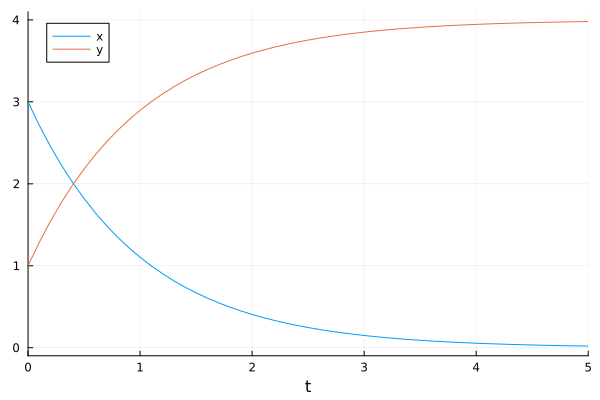

In [28]:
isys6_sol = solve(isys6_prob, Tsit5(); saveat=0.1)
plot(isys6_sol, idxs=[sys.x, sys.y]) |> display

### .7 (sys, u0map=[sys.x=>1.0, sys.y=>1.0], pmap=[total=>4.0])

In [32]:
isys7 = generate_initializesystem(sys, u0map=[sys.x=>1.0, sys.y=>1.0], pmap=[total=>4.0])

Model sys:
Equations (4):
  4 standard: see equations(sys)
Unknowns (3): see unknowns(sys)
  x(t) [defaults to 1.0]
  y(t) [defaults to 1.0]
  total [defaults to 4.0]
Parameters (5): see parameters(sys)
  Initial(y(t)) [defaults to 0]
  Initial(x(t)) [defaults to 0]
  Initial(yˍt(t)) [defaults to 0]
  Initial(xˍt(t)) [defaults to 0]
  ⋮

In [31]:
parameters(isys7) |> display
equations(isys7) |> display
unknowns(isys7) |> display
observed(isys7) |> display

5-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 Initial(y(t))
 Initial(x(t))
 Initial(yˍt(t))
 Initial(xˍt(t))
 t

4-element Vector{Equation}:
 0 ~ 1.0 - x(t)
 0 ~ 1.0 - y(t)
 0 ~ 4.0 - total
 0 ~ total - x(t) - y(t)

3-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 x(t)
 y(t)
 total

Equation[]

In [33]:
isys = structural_simplify(isys7; fully_determined = false)

Model sys:
Equations (1):
  1 standard: see equations(sys)
Parameters (5): see parameters(sys)
  t
  Initial(y(t)) [defaults to 0]
  Initial(x(t)) [defaults to 0]
  Initial(yˍt(t)) [defaults to 0]
  ⋮
Observed (3): see observed(sys)

In [34]:
isys7_prob = ODEProblem(sys, [sys.x=>1.0, sys.y=>1.0], (0.0, 5.0), [total => 4.0])

┌ Warning: Initialization system is overdetermined. 1 equations for 0 unknowns. Initialization will default to using least squares. `SCCNonlinearProblem` can only be used for initialization of fully determined systems and hence will not be used here. To suppress this warning pass warn_initialize_determined = false. To make this warning into an error, pass fully_determined = true
└ @ ModelingToolkit C:\Users\TCY\.julia\packages\ModelingToolkit\aau6A\src\systems\diffeqs\abstractodesystem.jl:1520


ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: OVERDETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 1.0

In [35]:
isys7_prob_initsys = isys7_prob.f.initializeprob.f.sys

Model sys:
Equations (1):
  1 standard: see equations(sys)
Parameters (5): see parameters(sys)
  t
  Initial(y(t)) [defaults to 0]
  Initial(x(t)) [defaults to 0]
  Initial(yˍt(t)) [defaults to 0]
  ⋮
Observed (3): see observed(sys)

In [36]:
equations(isys7_prob_initsys)

1-element Vector{Equation}:
 0 ~ total - x(t) - y(t)

In [37]:
observed(isys7_prob_initsys)

3-element Vector{Equation}:
 x(t) ~ Initial(x(t))
 y(t) ~ Initial(y(t))
 total ~ 4.0

### remake: sys.x => nothing

In [38]:
isys7_prob_remaked = remake(isys7_prob; u0 = [sys.x => nothing])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 3.0

In [39]:
isys7_prob_remaked_initsys = isys7_prob_remaked.f.initializeprob.f.sys

Model sys:
Parameters (5): see parameters(sys)
  t
  Initial(y(t)) [defaults to 0]
  Initial(x(t)) [defaults to 0]
  Initial(yˍt(t)) [defaults to 0]
  ⋮
Observed (3): see observed(sys)

In [40]:
equations(isys7_prob_remaked_initsys)

Equation[]

In [41]:
observed(isys7_prob_remaked_initsys)

3-element Vector{Equation}:
 y(t) ~ Initial(y(t))
 total ~ 4.0
 x(t) ~ total - y(t)

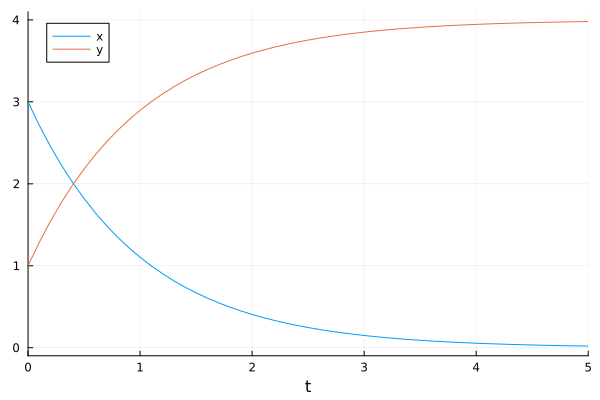

In [42]:
isys7_remaked_sol = solve(isys7_prob_remaked, Tsit5(); saveat=0.1)
plot(isys7_remaked_sol, idxs=[sys.x, sys.y]) |> display

### remake: total => nothing

In [43]:
isys7_prob_remaked2 = remake(isys7_prob; p = [total => nothing])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 1.0

In [44]:
isys7_prob_remaked2_initsys = isys7_prob_remaked2.f.initializeprob.f.sys

Model sys:
Parameters (5): see parameters(sys)
  t
  Initial(y(t)) [defaults to 0]
  Initial(x(t)) [defaults to 0]
  Initial(yˍt(t)) [defaults to 0]
  ⋮
Observed (3): see observed(sys)

In [45]:
equations(isys7_prob_remaked2_initsys)

Equation[]

In [46]:
observed(isys7_prob_remaked2_initsys)

3-element Vector{Equation}:
 x(t) ~ Initial(x(t))
 y(t) ~ Initial(y(t))
 total ~ x(t) + y(t)

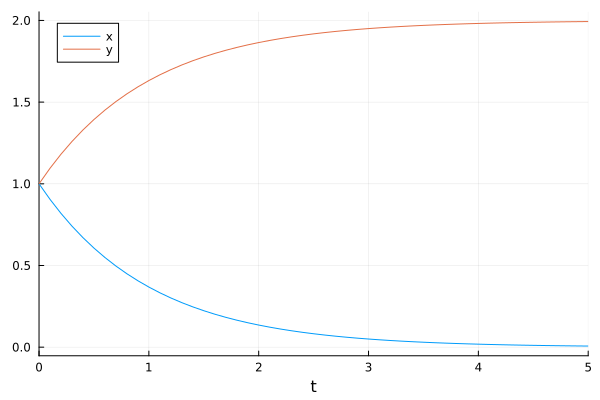

In [47]:
isys7_remaked2_sol = solve(isys7_prob_remaked2, Tsit5(); saveat=0.1)
plot(isys7_remaked2_sol, idxs=[sys.x, sys.y]) |> display

### remake => total => missing

In [48]:
isys7_prob_remaked3 = remake(isys7_prob; p = [total => missing])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: false
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 1.0

In [49]:
isys7_prob_remaked3_initsys = isys7_prob_remaked3.f.initializeprob.f.sys

Model sys:
Parameters (5): see parameters(sys)
  t
  Initial(y(t)) [defaults to 0]
  Initial(x(t)) [defaults to 0]
  Initial(yˍt(t)) [defaults to 0]
  ⋮
Observed (3): see observed(sys)

In [50]:
equations(isys7_prob_remaked3_initsys)

Equation[]

In [51]:
observed(isys7_prob_remaked3_initsys)

3-element Vector{Equation}:
 x(t) ~ Initial(x(t))
 y(t) ~ Initial(y(t))
 total ~ x(t) + y(t)

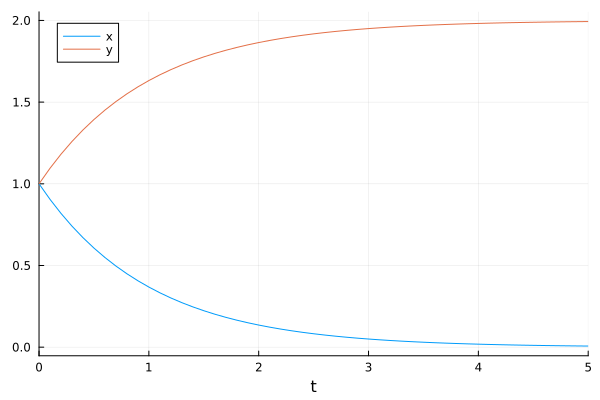

In [52]:
isys7_remaked3_sol = solve(isys7_prob_remaked3, Tsit5(); saveat=0.1)
plot(isys7_remaked3_sol, idxs=[sys.x, sys.y]) |> display